In [21]:
import pandas as pd
#from youtube_crawler import *
import json
import sys
import csv
import re
from bs4 import BeautifulSoup
import requests
from selenium import webdriver
import json, time
import numpy as np

In [2]:
df = pd.read_csv('DJNA.csv')

In [3]:
from selenium import webdriver
import json, time 

def get_videos(ticker):
    driver = webdriver.Chrome("/Users/miao/Desktop/chromedriver") #add path to webdriver
    driver.get('https://www.youtube.com/results?search_query={}+stock'.format(ticker))

    youtube_data = []

    # scrolling to the end of the page
    while True:
        # end_result = "No more results" string at the bottom of the page
        # this will be used to break out of the while loop
        end_result = driver.find_element_by_css_selector('#message').is_displayed()
        driver.execute_script("var scrollingElement = (document.scrollingElement || document.body);scrollingElement.scrollTop = scrollingElement.scrollHeight;")
        #print(end_result)

        if end_result == True:
            break

    print('Extracting results for {}. It might take a while...'.format(ticker))

    for result in driver.find_elements_by_css_selector('.text-wrapper.style-scope.ytd-video-renderer'):
        title = result.find_element_by_css_selector('.title-and-badge.style-scope.ytd-video-renderer').text
        link = result.find_element_by_css_selector('.title-and-badge.style-scope.ytd-video-renderer a').get_attribute('href')
        channel_name = result.find_element_by_css_selector('.long-byline').text
        channel_link = result.find_element_by_css_selector('#text > a').get_attribute('href')
        views = result.find_element_by_css_selector('.style-scope ytd-video-meta-block').text.split('\n')[0]

        try:
            time_published = result.find_element_by_css_selector('.style-scope ytd-video-meta-block').text.split('\n')[1]
        except:
            time_published = None

        try:
            snippet = result.find_element_by_css_selector('.metadata-snippet-container').text
        except:
            snippet = None

        try:
            if result.find_element_by_css_selector('#channel-name .ytd-badge-supported-renderer') is not None:
                verified_badge = True
            else:
                verified_badge = False
        except:
            verified_badge = None

        try:
            extensions = result.find_element_by_css_selector('#badges .ytd-badge-supported-renderer').text
        except:
            extensions = None
        #print(verified_badge)
        
        #threshold for views above 1000
        #if "K" in views or "M" in views:
        youtube_data.append({
                'title': title,
                'link': link,
                'channel_name': channel_name, 
                'channel_link': channel_link,
                'views': views,
                'time_published': time_published,
                'snippet': snippet,
                'verified_badge': verified_badge,
                'extensions': extensions,
            })
        
    print("crawled", len(youtube_data), "videos")
    #print(json.dumps(youtube_data, indent=2, ensure_ascii=False))
    driver.quit()
    
    return youtube_data


In [4]:
video_lst = {}

for index, row in df.iterrows():
    a = time.time()
    ticker, noise, name = row[0], row[1], row[2]
    if noise == 0:
        search = ticker
    else:
        search = name
    
    videos = get_videos(search)
    video_lst[row[0]] = videos

Extracting results for UNH. It might take a while...
crawled 565 videos
Extracting results for GS. It might take a while...
crawled 794 videos
Extracting results for HD. It might take a while...
crawled 729 videos
Extracting results for MSFT. It might take a while...
crawled 627 videos
Extracting results for MCD. It might take a while...
crawled 682 videos
Extracting results for AMGN. It might take a while...
crawled 640 videos
Extracting results for Visa. It might take a while...
crawled 730 videos
Extracting results for CRM. It might take a while...
crawled 669 videos
Extracting results for Caterpillar Inc. It might take a while...
crawled 660 videos
Extracting results for BA. It might take a while...
crawled 711 videos
Extracting results for HON. It might take a while...
crawled 558 videos
Extracting results for AXP. It might take a while...
crawled 742 videos
Extracting results for TRV. It might take a while...
crawled 672 videos
Extracting results for JNJ. It might take a while...

KeyboardInterrupt: 

In [6]:
video_lst.keys()

dict_keys(['UNH', 'GS', 'HD', 'MSFT', 'MCD', 'AMGN', 'V', 'CRM', 'CAT', 'BA', 'HON', 'AXP', 'TRV', 'JNJ', 'AAPL', 'CVX', 'PG', 'MMM'])

In [11]:
for index, row in df[18:].iterrows():
    a = time.time()
    ticker, noise, name = row[0], row[1], row[2]
    if noise == 0:
        search = ticker
    else:
        search = name
    
    videos = get_videos(search)
    video_lst[row[0]] = videos
    print('time used', time.time()-a)

Extracting results for DIS. It might take a while...
crawled 733 videos
time used 259.91803002357483
Extracting results for WMT. It might take a while...
crawled 725 videos
time used 250.9026710987091
Extracting results for JPM. It might take a while...
crawled 742 videos
time used 270.31841683387756
Extracting results for NKE. It might take a while...
crawled 717 videos
time used 241.0455617904663
Extracting results for IBM. It might take a while...
crawled 653 videos
time used 223.96575117111206
Extracting results for MRK. It might take a while...
crawled 690 videos
time used 232.08766412734985
Extracting results for KO. It might take a while...
crawled 717 videos
time used 239.55556893348694
Extracting results for Dow Inc.. It might take a while...
crawled 709 videos
time used 236.20775604248047
Extracting results for CSCO. It might take a while...
crawled 678 videos
time used 375.0756001472473
Extracting results for VZ. It might take a while...
crawled 684 videos
time used 226.4343

In [12]:
with open("raw_videos_R50.json", "w") as outfile:
    json.dump(video_lst, outfile)

In [13]:
len(video_lst.keys())

30

In [14]:
video_df = {'ticker':[], 'title':[], 'snippet':[], 'link':[],
            'channel_name':[], 'channel_link':[], 'views':[], 'time_published':[]} 
for ticker, videos in video_lst.items():
    for video in videos:
        video_df['ticker'].append(ticker)
        video_df['title'].append(video['title'])
        video_df['link'].append(video['link'])
        video_df['views'].append(video['views'])
        video_df['channel_name'].append(video['channel_name'])
        video_df['channel_link'].append(video['channel_link'])
        video_df['time_published'].append(video['time_published'])
        video_df['snippet'].append(video['snippet'])

In [15]:
video_df = pd.DataFrame(video_df)

In [63]:
data.to_csv("videos_dow.csv", encoding='utf-8', index=False)

In [16]:
video_df

,ticker,title,snippet,link,channel_name,channel_link,views,time_published
0,UNH,"Joe Terranova's top 2022 stock picks: UNH, XM,...",Turn to CNBC TV for the latest stock market ne...,https://www.youtube.com/watch?v=yqQykd_WKEs,CNBC Television,https://www.youtube.com/c/CNBCtelevision,12K views,2 months ago
1,UNH,UNH Stock - is UnitedHealth's Stock a Good Buy...,DISCLAIMER: I am not a financial advisor. Thes...,https://www.youtube.com/watch?v=WndD1Oa_SM4,Learn to Invest,https://www.youtube.com/c/LearntoInvest,7.2K views,3 years ago
2,UNH,UNH Stock Analysis | Long Term Investing April...,In this video I show my stock analysis for UNH...,https://www.youtube.com/watch?v=-HiExRdSTA4,Market Matt,https://www.youtube.com/channel/UCOv4iOGr9Zz4F...,956 views,10 months ago
3,UNH,"Target, TJX and United Healthcare: What the an...",Pete Najarian and Shannon Saccocia join Halfti...,https://www.youtube.com/watch?v=WO8uSg0x60w,CNBC Television,https://www.youtube.com/c/CNBCtelevision,5.2K views,4 months ago
4,UNH,UnitedHealth Stock Analysis: A Winner In These...,CHECK OUT WHAT SEEKING ALPHA HAS TO SAY ABOUT ...,https://www.youtube.com/watch?v=R8kVPLkc4zE,NEXT LEVEL INVESTMENTS,https://www.youtube.com/channel/UCd3NlLrWE8mHr...,302 views,2 months ago
...,...,...,...,...,...,...,...,...
20615,WBA,ELE FICOU RICO FAZENDO DELIVERY DE BICICLETA N...,ESSE TITULO TA UMA MENTIRA KK CONTINUO POBRE E...,https://www.youtube.com/watch?v=NvviGSGEGYk,NÃO ME CONDENE,https://www.youtube.com/c/N%C3%83OMECONDENECRE...,2K views,8 days ago
20616,WBA,"Apprendre le CSS - Chapitre 1, comment utilise...","Dans ce cours, nous allons apprendre à utilisé...",https://www.youtube.com/watch?v=bigdp6yaaV8,Homedeve,https://www.youtube.com/c/Homedeve,42 views,5 days ago
20617,WBA,Technical Analysis - DOWJONES (11.03.2022),Was this video helpful? Subscribe to our YouTu...,https://www.youtube.com/watch?v=eQ_YTx1D1Ws,Windsor Brokers,https://www.youtube.com/user/windsorbrokersforex,7 views,2 days ago
20618,WBA,Technical Analysis - WTI&BRE OIL (11.03.2022),Was this video helpful? Subscribe to our YouTu...,https://www.youtube.com/watch?v=XgM5O8YEC1c,Windsor Brokers,https://www.youtube.com/user/windsorbrokersforex,No views,2 days ago


In [17]:
data = video_df.copy()

In [18]:
def na_value(x):
    if x==None:
        return ''
    else:
        return x

In [19]:
data['snippet'] = data['snippet'].apply(na_value)

In [34]:
np.sum(video_df['snippet'].apply(lambda x: x == None))

66

In [23]:
np.sum(data['snippet'].apply(lambda x: x == None))

0

In [24]:
data['text'] = data['title'] + data['snippet']

In [25]:
data_sum = data.groupby('ticker').sum()[['title', 'snippet', 'text']]

In [26]:
data_sum

,title,snippet,text
ticker,,,
AAPL,Apple Stock Analysis - AAPL Stock Is 'NOT' A B...,Apple Stock Analysis - AAPL Stock Is 'NOT' A B...,Apple Stock Analysis - AAPL Stock Is 'NOT' A B...
AMGN,Amgen Stock Analysis - $AMGN -is AMGN Stock a ...,"In this video, we analyze Amgen's stock to see...",Amgen Stock Analysis - $AMGN -is AMGN Stock a ...
AXP,American Express A Buy? American Express (AXP)...,Do you want to get a free stock share worth up...,American Express A Buy? American Express (AXP)...
BA,Boeing (BA) Stock - Earnings/Margins Still Neg...,Twitter (TWTR) stock price is up over 1% so fa...,Boeing (BA) Stock - Earnings/Margins Still Neg...
CAT,Why Caterpillar’s Stock Is SoaringCaterpillar ...,DISCLAIMER: I am not a financial advisor. Thes...,Why Caterpillar’s Stock Is SoaringCaterpillar ...
CRM,"Salesforce stock (CRM stock) - Down 30%, cheap...",Salesforce.com stock is down over 30% from its...,"Salesforce stock (CRM stock) - Down 30%, cheap..."
CSCO,Cisco Stock Analysis | Best Tech Stocks to Buy...,"Today, we'll perform a Cisco stock analysis, u...",Cisco Stock Analysis | Best Tech Stocks to Buy...
CVX,Chevron Stock Analysis - $CVX - is Chevron's S...,DISCLAIMER: I am not a financial advisor. Thes...,Chevron Stock Analysis - $CVX - is Chevron's S...
DIS,Disney Stock 2021 | Should I Buy Disney Stock?...,"Merry Christmas Eve! Today, we'll analyze Disn...",Disney Stock 2021 | Should I Buy Disney Stock?...


In [27]:
data_sum.to_csv("agg_dow.csv", encoding='utf-8', index=True)

In [28]:
data.groupby('ticker').count()

,title,snippet,link,channel_name,channel_link,views,time_published,text
ticker,,,,,,,,
AAPL,698,698,698,698,698,698,695,698
AMGN,640,640,640,640,640,640,639,640
AXP,742,742,742,742,742,742,739,742
BA,711,711,711,711,711,711,710,711
CAT,660,660,660,660,660,660,657,660
CRM,669,669,669,669,669,669,667,669
CSCO,678,678,678,678,678,678,678,678
CVX,741,741,741,741,741,741,736,741
DIS,733,733,733,733,733,733,726,733


In [35]:
data['time_published'] = data['time_published'].apply(na_value)

In [36]:
np.sum(data['time_published'].apply(lambda x: x == None))

0

In [37]:
def extract_year(t):
    if 'year' in t:
        return int(re.findall(r'\d+', t)[0])
    else:
        return 0

data['time_year'] = data['time_published'].apply(extract_year)

In [43]:
data_2 = data[data['time_year']<=2]

## Classification and topic modeling

In [58]:
#Special module written for this class
#This provides access to data and to helper functions from previous weeks
import lucem_illud #just in case, regularly update your lucem_illud with the following code: pip install git+git://github.com/UChicago-Computational-Content-Analysis/lucem_illud.git

#All these packages need to be installed from pip
import requests #for http requests
import pandas #gives us DataFrames
import matplotlib.pyplot as plt #For graphics
import wordcloud #Makes word clouds
import numpy as np #For divergences/distances
import scipy #For divergences/distances
import seaborn as sns #makes our plots look nicer
import sklearn.manifold #For a manifold plot
import json #For API responses
import urllib.parse #For joining urls

# comp-linguistics
import spacy

#Displays the graphs
import graphviz #You also need to install the command line graphviz

#These are from the standard library
import os.path
import zipfile
import subprocess
import io
import tempfile

#This 'magic' command makes the plots work better
#in the notebook, don't use it outside of a notebook
%matplotlib inline

In [48]:
#initialize
TFVectorizer = sklearn.feature_extraction.text.TfidfVectorizer(max_df=0.5, max_features=1000, min_df=3, stop_words='english', norm='l2')
#train
#initialize
dowTFVects = TFVectorizer.fit_transform(data['text'])

In [49]:
PCA = sklearn.decomposition.PCA
pca = PCA(n_components = 2).fit(gmeTFVects.toarray())
reduced_data = pca.transform(gmeTFVects.toarray())

In [50]:
def plotSilhouette(n_clusters, X):
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize = (15,5))
    
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])
    clusterer = sklearn.cluster.KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)
    
    silhouette_avg = sklearn.metrics.silhouette_score(X, cluster_labels)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = sklearn.metrics.silhouette_samples(X, cluster_labels)

    y_lower = 10
    
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        cmap = plt.cm.get_cmap("nipy_spectral")
        color = cmap(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        y_lower = y_upper + 10
    
    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    cmap = plt.cm.get_cmap("nipy_spectral")
    colors = cmap(float(i) / n_clusters)
    ax2.scatter(reduced_data[:, 0], reduced_data[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors)

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    projected_centers = pca.transform(centers)
    # Draw white circles at cluster centers
    ax2.scatter(projected_centers[:, 0], projected_centers[:, 1],
                marker='o', c="white", alpha=1, s=200)

    for i, c in enumerate(projected_centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50)

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("PC 1")
    ax2.set_ylabel("PC 2")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')
    plt.show()
    print("For n_clusters = {}, The average silhouette_score is : {:.3f}".format(n_clusters, silhouette_avg))

/anaconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:54: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:54: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:54: D

/anaconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:54: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:54: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:54: D

/anaconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:54: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:54: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:54: D

/anaconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:54: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:54: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:54: D

/anaconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:54: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:54: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:54: D

/anaconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:54: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:54: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:54: D

/anaconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:54: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:54: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:54: D

/anaconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:54: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:54: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:54: D

/anaconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:54: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:54: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:54: D

/anaconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:54: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:54: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:54: D

/anaconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:54: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:54: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:54: D

/anaconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:54: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:54: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:54: D

/anaconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:54: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:54: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:54: D

/anaconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:54: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:54: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:54: D

/anaconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:54: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:54: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:54: D

/anaconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:54: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:54: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:54: D

/anaconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:54: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:54: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:54: D

/anaconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:54: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:54: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:54: D

/anaconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:54: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:54: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:54: D

/anaconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:54: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:54: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:54: D

/anaconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:54: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:54: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:54: D

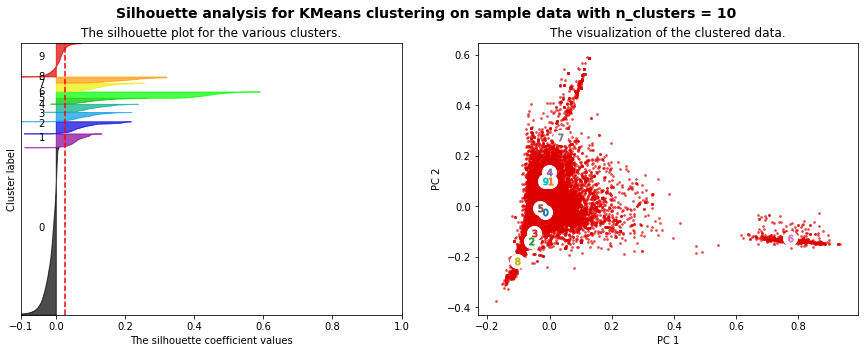

For n_clusters = 10, The average silhouette_score is : 0.026


In [54]:
X = dowTFVects.toarray()
plotSilhouette(10, X)

/anaconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:54: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:54: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:54: D

/anaconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:54: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:54: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
/anaconda3/lib/python3.7/site-packages/sklearn/cluster/k_means_.py:444: 

/anaconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:54: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:54: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:54: D

/anaconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:54: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:54: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:54: D

/anaconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:54: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:54: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:54: D

/anaconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:54: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:54: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:54: D

/anaconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:54: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:54: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:54: D

/anaconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:54: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:54: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:54: D

/anaconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:54: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:54: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:54: D

/anaconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:54: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:54: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:54: D

/anaconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:54: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:54: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:54: D

/anaconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:54: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:54: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:54: D

/anaconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:54: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:54: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:54: D

/anaconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:54: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:54: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:54: D

/anaconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:54: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:54: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:54: D

/anaconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:54: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:54: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:54: D

/anaconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:54: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:54: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:54: D

/anaconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:54: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:54: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:54: D

/anaconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:54: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:54: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:54: D

/anaconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:54: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:54: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:54: D

/anaconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:54: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:54: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:54: D

/anaconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:54: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:54: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:54: D

/anaconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:54: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:54: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:54: D

/anaconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:54: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:54: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:54: D

/anaconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:54: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:54: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:54: D

/anaconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:54: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:54: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:54: D

/anaconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:54: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:54: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:54: D

/anaconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:54: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:54: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
/anaconda3/lib/python3.7/site-packages/sklearn/cluster/k_means_.py:444: 

/anaconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:54: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:54: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:54: D

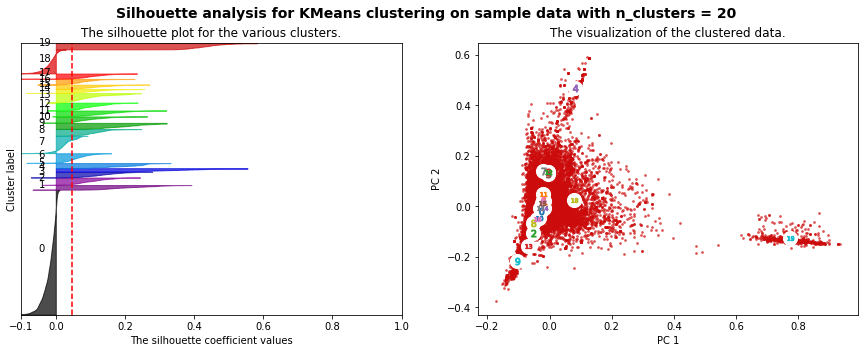

For n_clusters = 20, The average silhouette_score is : 0.048


In [56]:
X = dowTFVects.toarray()
plotSilhouette(20, X)

In [57]:
plt.savefig('dow_sil20.jpg')

<Figure size 432x288 with 0 Axes>

In [59]:
data['tokenized_text'] = data['title'].apply(lambda x: lucem_illud.word_tokenize(x))
data['normalized_tokens'] = data['title'].apply(lambda x: lucem_illud.normalizeTokens(x))

In [60]:
data.head()

,ticker,title,snippet,link,channel_name,channel_link,views,time_published,text,time_year,tokenized_text,normalized_tokens
0,UNH,"Joe Terranova's top 2022 stock picks: UNH, XM,...",Turn to CNBC TV for the latest stock market ne...,https://www.youtube.com/watch?v=yqQykd_WKEs,CNBC Television,https://www.youtube.com/c/CNBCtelevision,12K views,2 months ago,"Joe Terranova's top 2022 stock picks: UNH, XM,...",0,"[Joe, Terranova, 's, top, 2022, stock, picks, ...","[joe, terranova, stock, pick, unh, xm, ibkr]"
1,UNH,UNH Stock - is UnitedHealth's Stock a Good Buy...,DISCLAIMER: I am not a financial advisor. Thes...,https://www.youtube.com/watch?v=WndD1Oa_SM4,Learn to Invest,https://www.youtube.com/c/LearntoInvest,7.2K views,3 years ago,UNH Stock - is UnitedHealth's Stock a Good Buy...,3,"[UNH, Stock, is, UnitedHealth, 's, Stock, a, G...","[unh, stock, unitedhealth, stock, good, buy, t..."
2,UNH,UNH Stock Analysis | Long Term Investing April...,In this video I show my stock analysis for UNH...,https://www.youtube.com/watch?v=-HiExRdSTA4,Market Matt,https://www.youtube.com/channel/UCOv4iOGr9Zz4F...,956 views,10 months ago,UNH Stock Analysis | Long Term Investing April...,0,"[UNH, Stock, Analysis, |, Long, Term, Investin...","[unh, stock, analysis, |, long, term, invest, ..."
3,UNH,"Target, TJX and United Healthcare: What the an...",Pete Najarian and Shannon Saccocia join Halfti...,https://www.youtube.com/watch?v=WO8uSg0x60w,CNBC Television,https://www.youtube.com/c/CNBCtelevision,5.2K views,4 months ago,"Target, TJX and United Healthcare: What the an...",0,"[Target, TJX, and, United, Healthcare, What, t...","[target, tjx, unite, healthcare, analyst, say]"
4,UNH,UnitedHealth Stock Analysis: A Winner In These...,CHECK OUT WHAT SEEKING ALPHA HAS TO SAY ABOUT ...,https://www.youtube.com/watch?v=R8kVPLkc4zE,NEXT LEVEL INVESTMENTS,https://www.youtube.com/channel/UCd3NlLrWE8mHr...,302 views,2 months ago,UnitedHealth Stock Analysis: A Winner In These...,0,"[UnitedHealth, Stock, Analysis, A, Winner, In,...","[unitedhealth, stock, analysis, winner, time, ..."


In [61]:
def dropMissing(wordLst, vocab):
    return [w for w in wordLst if w in vocab]

data['reduced_tokens'] = data['normalized_tokens'].apply(lambda x: dropMissing(x, TFVectorizer.vocabulary_.keys()))

In [65]:
dictionary = gensim.corpora.Dictionary(data['reduced_tokens'])
corpus = [dictionary.doc2bow(text) for text in data['reduced_tokens']]
gensim.corpora.MmCorpus.serialize('dow.mm', corpus)
dow = gensim.corpora.MmCorpus('dow.mm')

In [66]:
%%time
dowlda = gensim.models.ldamodel.LdaModel(corpus=dow, id2word=dictionary, num_topics=10, alpha='auto', eta='auto')

CPU times: user 5.24 s, sys: 561 ms, total: 5.8 s
Wall time: 7.52 s


In [67]:
topicsDict = {}
for topicNum in range(dowlda.num_topics):
    topicWords = [w for w, p in dowlda.show_topic(topicNum)]
    topicsDict['Topic_{}'.format(topicNum)] = topicWords

wordRanksDF = pd.DataFrame(topicsDict)
wordRanksDF

,Topic_0,Topic_1,Topic_2,Topic_3,Topic_4,Topic_5,Topic_6,Topic_7,Topic_8,Topic_9
0,ko,buy,analysis,wba,dividend,buy,walgreens,news,market,intc
1,video,dividend,buy,trade,invest,verizon,vz,nke,ibm,tech
2,vs,growth,intel,analysis,analysis,share,share,market,live,buy
3,morgan,new,cisco,price,term,earnings,pick,johnson,walmart,chevron
4,dis,high,chart,prediction,buy,mrk,update,today,intc,robinhood
5,jp,penny,csco,dow,short,nike,watchlist,sell,crash,valuation
6,free,kaise,earnings,alliance,oil,disney,dwac,strategy,share,analysis
7,mmm,nyse,dividend,day,cvx,intel,play,opportunity,dow,big
8,official,yield,apple,wmt,mar,cvs,ko,forecast,spy,mrna
9,incoming,russia,value,nasdaq,need,merck,portfolio,daily,tsla,ceo


In [291]:
data.head()

,ticker,title,snippet,link,channel_name,channel_link,views,time_published,text,time_year,tokenized_text,normalized_tokens,reduced_tokens,tokenized_texts,normalized_texts
0,UNH,"Joe Terranova's top 2022 stock picks: UNH, XM,...",Turn to CNBC TV for the latest stock market ne...,https://www.youtube.com/watch?v=yqQykd_WKEs,CNBC Television,https://www.youtube.com/c/CNBCtelevision,12K views,2 months ago,"Joe Terranova's top 2022 stock picks: UNH, XM,...",0,"[Joe, Terranova, 's, top, 2022, stock, picks, ...","[joe, terranova, stock, pick, unh, xm, ibkr]","[joe, pick, unh]","[[Joe, Terranova, 's, top, 2022, stock, picks,...","[[joe, terranova, stock, pick, unh, xm, ibkr]]"
1,UNH,UNH Stock - is UnitedHealth's Stock a Good Buy...,DISCLAIMER: I am not a financial advisor. Thes...,https://www.youtube.com/watch?v=WndD1Oa_SM4,Learn to Invest,https://www.youtube.com/c/LearntoInvest,7.2K views,3 years ago,UNH Stock - is UnitedHealth's Stock a Good Buy...,3,"[UNH, Stock, is, UnitedHealth, 's, Stock, a, G...","[unh, stock, unitedhealth, stock, good, buy, t...","[unh, unitedhealth, good, buy, today]","[[UNH, Stock, is, UnitedHealth, 's, Stock, a, ...","[[unh, stock, unitedhealth, stock, good, buy, ..."
2,UNH,UNH Stock Analysis | Long Term Investing April...,In this video I show my stock analysis for UNH...,https://www.youtube.com/watch?v=-HiExRdSTA4,Market Matt,https://www.youtube.com/channel/UCOv4iOGr9Zz4F...,956 views,10 months ago,UNH Stock Analysis | Long Term Investing April...,0,"[UNH, Stock, Analysis, |, Long, Term, Investin...","[unh, stock, analysis, |, long, term, invest, ...","[unh, analysis, long, term, invest, april]","[[UNH, Stock, Analysis, |, Long, Term, Investi...","[[unh, stock, analysis, |, long, term, invest,..."
3,UNH,"Target, TJX and United Healthcare: What the an...",Pete Najarian and Shannon Saccocia join Halfti...,https://www.youtube.com/watch?v=WO8uSg0x60w,CNBC Television,https://www.youtube.com/c/CNBCtelevision,5.2K views,4 months ago,"Target, TJX and United Healthcare: What the an...",0,"[Target, TJX, and, United, Healthcare, What, t...","[target, tjx, unite, healthcare, analyst, say]","[target, healthcare, analyst, say]","[[Target, TJX, and, United, Healthcare, What, ...","[[target, tjx, unite, healthcare, analyst, say]]"
4,UNH,UnitedHealth Stock Analysis: A Winner In These...,CHECK OUT WHAT SEEKING ALPHA HAS TO SAY ABOUT ...,https://www.youtube.com/watch?v=R8kVPLkc4zE,NEXT LEVEL INVESTMENTS,https://www.youtube.com/channel/UCd3NlLrWE8mHr...,302 views,2 months ago,UnitedHealth Stock Analysis: A Winner In These...,0,"[UnitedHealth, Stock, Analysis, A, Winner, In,...","[unitedhealth, stock, analysis, winner, time, ...","[unitedhealth, analysis, time, share, care]","[[UnitedHealth, Stock, Analysis, A, Winner, In...","[[unitedhealth, stock, analysis, winner, time,..."


In [69]:
data['tokenized_texts'] = data['tokenized_text'].apply(lambda x: [x])
data['normalized_texts'] = data['normalized_tokens'].apply(lambda x: [x])

In [70]:
W2V = gensim.models.word2vec.Word2Vec(data['normalized_texts'].sum(), sg=0)

In [71]:
len(data['normalized_texts'].sum())

20620

In [292]:
data['normalized_texts'].sum()

[['joe', 'terranova', 'stock', 'pick', 'unh', 'xm', 'ibkr'],
 ['unh', 'stock', 'unitedhealth', 'stock', 'good', 'buy', 'today'],
 ['unh', 'stock', 'analysis', '|', 'long', 'term', 'invest', 'april'],
 ['target', 'tjx', 'unite', 'healthcare', 'analyst', 'say'],
 ['unitedhealth',
  'stock',
  'analysis',
  'winner',
  'time',
  'share',
  'expensive',
  '|',
  'heath',
  'care',
  'stock'],
 ['unitedhealth',
  'insurance',
  'unh',
  'stock',
  '|',
  'long',
  'term',
  'analysis',
  '|',
  'overvalue',
  'undervalue',
  '|'],
 ['unh',
  'stock',
  'analysis',
  '|',
  'unite',
  'health',
  'group',
  'stock',
  'fair',
  'value'],
 ['一支能够抗经济衰退的股票', '它在回调', '未来是机会?【美股分析'],
 ['technical', 'analysis', 'hard'],
 ['🔥',
  'stock',
  '🔥',
  'uranium',
  'stock',
  'buy',
  'asap|',
  'uec',
  'stock|',
  'uuuu',
  'stock|',
  'dnn',
  'stock|'],
 ['unhhhh',
  'ep',
  'global',
  'warm',
  'trixie',
  'mattel',
  'katya',
  'zamolodchikova'],
 ['value', 'stock'],
 ['stock', 'pick', 'amzn', 'p

In [72]:
W2V.wv.vocab

{'joe': <gensim.models.keyedvectors.Vocab at 0x136f09ba8>,
 'stock': <gensim.models.keyedvectors.Vocab at 0x12b6029b0>,
 'pick': <gensim.models.keyedvectors.Vocab at 0x12b602a20>,
 'unh': <gensim.models.keyedvectors.Vocab at 0x12b6029e8>,
 'unitedhealth': <gensim.models.keyedvectors.Vocab at 0x12b602780>,
 'good': <gensim.models.keyedvectors.Vocab at 0x12b602588>,
 'buy': <gensim.models.keyedvectors.Vocab at 0x12b6023c8>,
 'today': <gensim.models.keyedvectors.Vocab at 0x12b602390>,
 'analysis': <gensim.models.keyedvectors.Vocab at 0x12b602518>,
 '|': <gensim.models.keyedvectors.Vocab at 0x12b6027f0>,
 'long': <gensim.models.keyedvectors.Vocab at 0x12b602908>,
 'term': <gensim.models.keyedvectors.Vocab at 0x13671f8d0>,
 'invest': <gensim.models.keyedvectors.Vocab at 0x13671fac8>,
 'april': <gensim.models.keyedvectors.Vocab at 0x13671fb70>,
 'target': <gensim.models.keyedvectors.Vocab at 0x13671f128>,
 'unite': <gensim.models.keyedvectors.Vocab at 0x13671fa58>,
 'healthcare': <gensim.mod

In [73]:
W2V.most_similar('bullish')

[('sens', 0.9973596930503845),
 ('wkhs', 0.99676114320755),
 ('nikola', 0.9958415031433105),
 ('💸', 0.9951775074005127),
 ('3/04/22', 0.9951221942901611),
 ('ostk', 0.9947911500930786),
 ('idex', 0.9945400953292847),
 ('jan', 0.9943699836730957),
 ('atvi', 0.9938299059867859),
 ('cgc', 0.9933562278747559)]

In [185]:
W2V.most_similar('bearish')

[('win', 0.9982383251190186),
 ('wrap', 0.9976853132247925),
 ('forex', 0.9976658225059509),
 ('dks', 0.9975663423538208),
 ('dec', 0.9975463151931763),
 ('setup', 0.9975001811981201),
 ('profitable', 0.9972339272499084),
 ('profit', 0.9972134828567505),
 ('apr', 0.9970535039901733),
 ('fibonacci', 0.9965660572052002)]

In [131]:
W2V.most_similar('earnings')

[('company', 0.9599952101707458),
 ('microsoft', 0.9552680253982544),
 ('nike', 0.9489477276802063),
 ('corporation', 0.9482711553573608),
 ('q4', 0.94797283411026),
 ('q2', 0.9470137357711792),
 ('intc', 0.9455239176750183),
 ('q3', 0.9450819492340088),
 ('intel', 0.9433318376541138),
 ('cisco', 0.9400657415390015)]

In [74]:
W2V.most_similar('gme')

[('bmbl', 0.9938085675239563),
 ('prog', 0.9914260506629944),
 ('play', 0.9910891056060791),
 ('⚠', 0.9910340905189514),
 ('csx', 0.988318920135498),
 ('gfai', 0.9866268038749695),
 ('sava', 0.9863932132720947),
 ('eeenf', 0.9862016439437866),
 ('phun', 0.985395610332489),
 ('upcoming', 0.9852623343467712)]

In [75]:
W2V.most_similar('robinhood')

[('daily', 0.9848865270614624),
 ('signal', 0.9789457321166992),
 ('mar', 0.9774197936058044),
 ('boeing', 0.9757629632949829),
 ('🔴', 0.9720672965049744),
 ('november', 0.9696273803710938),
 ('direction', 0.9694632291793823),
 ('salesforce.com', 0.9690853953361511),
 ('fundamental', 0.9645190834999084),
 ('salesforce', 0.9639217853546143)]

In [76]:
W2V.most_similar('recession')

[('pull', 0.9991503953933716),
 ('rule', 0.9989659786224365),
 ('cpu', 0.9988309144973755),
 ('smart', 0.9987213611602783),
 ('will', 0.9986720085144043),
 ('michael', 0.9986360669136047),
 ('ram', 0.9986204504966736),
 ('claim', 0.998573362827301),
 ('budget', 0.9985356330871582),
 ('board', 0.9985253810882568)]

In [77]:
W2V.most_similar('bubble')

[('rich', 0.9990004301071167),
 ('galaxy', 0.9988605380058289),
 ('process', 0.9988270998001099),
 ('road', 0.9988020658493042),
 ('create', 0.9987825155258179),
 ('e', 0.9987608194351196),
 ('student', 0.9987585544586182),
 ('क्या', 0.9987531304359436),
 ('sign', 0.9986668825149536),
 ('train', 0.9986492395401001)]

In [90]:
W2V.most_similar('money')

[('scary', 0.9964930415153503),
 ('volatile', 0.9959591627120972),
 ('episode', 0.9952225685119629),
 ('c', 0.9952021241188049),
 ('plummet', 0.9950683116912842),
 ('important', 0.994834303855896),
 ('chwy', 0.9947737455368042),
 ('consider', 0.9943984150886536),
 ('correction', 0.9942219257354736),
 ('crush', 0.9942127466201782)]

In [79]:
W2V.most_similar('wallstreet')

[('talk', 0.9971776008605957),
 ('margin', 0.9970964789390564),
 ('warm', 0.9968824982643127),
 ('benavidez', 0.9967257976531982),
 ('panel', 0.9967156648635864),
 ('dltr', 0.9966790676116943),
 ('x', 0.9966589212417603),
 ('efx', 0.9965850114822388),
 ('🍾', 0.996475875377655),
 ('type', 0.9964264631271362)]

In [80]:
W2V.most_similar('manager')

[('technology', 0.9986727833747864),
 ('feature', 0.998621940612793),
 ('tank', 0.9983009099960327),
 ('performance', 0.9982641935348511),
 ('flowlu', 0.9982585906982422),
 ('stock|', 0.9982436895370483),
 ('paper', 0.9982261657714844),
 ('number', 0.998100221157074),
 ('trial', 0.9980009198188782),
 ('prospect', 0.9979715347290039)]

In [81]:
W2V.most_similar('jpmorgan')

[('outperform', 0.9978508353233337),
 ('insurance', 0.9974492192268372),
 ('crush', 0.9971209168434143),
 ('return', 0.9970287084579468),
 ('fall', 0.9968537092208862),
 ('trend', 0.9967707395553589),
 ('harry', 0.9967631101608276),
 ('point', 0.9962562918663025),
 ('presentation', 0.9962369799613953),
 ('netflix', 0.996127724647522)]

In [105]:
W2V.most_similar('buy')

[('good', 0.9786529541015625),
 ('well', 0.974840521812439),
 ('value', 0.9641938209533691),
 ('undervalue', 0.9598416090011597),
 ('invest', 0.9571746587753296),
 ('disney', 0.9551172256469727),
 ('colon', 0.9490231275558472),
 ('portfolio', 0.9484702944755554),
 ('salesforce', 0.941338837146759),
 ('fair', 0.9390048980712891)]

In [91]:
W2V.most_similar('musk')

[('elon', 0.9992209672927856),
 ('economy', 0.9985229969024658),
 ('hike', 0.9984334707260132),
 ('economic', 0.9984093904495239),
 ('🍾', 0.998213529586792),
 ('margin', 0.998213529586792),
 ('efx', 0.9980971813201904),
 ('sue', 0.9980335235595703),
 ('lockout', 0.9980185031890869),
 ('trump', 0.9977664351463318)]

In [132]:
W2V.most_similar('report')

[('q2', 0.9833577871322632),
 ('q4', 0.9824917316436768),
 ('q3', 0.9810506105422974),
 ('q1', 0.9790950417518616),
 ('beat', 0.973516583442688),
 ('mcdonald', 0.9726033210754395),
 ('ibm', 0.9674404859542847),
 ('estimate', 0.9669090509414673),
 ('amgen', 0.9587341547012329),
 ('chevron', 0.9585407972335815)]

In [182]:
W2V.most_similar(positive=['gme', 'bullish'], negative = ['bearish'])

[('bbby', 0.984910249710083),
 ('crwd', 0.9846829175949097),
 ('phun', 0.9845882654190063),
 ('sofi', 0.9826633930206299),
 ('technicals', 0.9820405840873718),
 ('li', 0.9817789793014526),
 ('lcid', 0.9813664555549622),
 ('spce', 0.9808778762817383),
 ('😳', 0.980793833732605),
 ('⚠', 0.9807894229888916)]

In [127]:
numWords = 65
targetWords = W2V.wv.index2word[:numWords]

In [128]:
wordsSubMatrix = []
for word in targetWords:
    wordsSubMatrix.append(W2V[word])
wordsSubMatrix = np.array(wordsSubMatrix)
wordsSubMatrix

array([[-0.27976954,  0.3230302 ,  0.7267803 , ..., -0.93492424,
        -0.5723142 ,  0.58949906],
       [-0.10130916,  0.44419262,  0.30202723, ..., -0.6534261 ,
        -0.05047024,  0.4550181 ],
       [-0.5071296 ,  0.5124628 ,  0.6993418 , ..., -0.65076035,
        -1.1316323 ,  0.79999095],
       ...,
       [ 0.05214278,  0.16108392,  0.34208763, ..., -0.25431728,
        -0.27851582,  0.32966638],
       [-0.02691092,  0.09394491,  0.23141338, ..., -0.00804755,
        -0.2112425 ,  0.25280362],
       [-0.1877658 ,  0.27179965,  0.28941277, ..., -0.25911278,
        -0.3565111 ,  0.51433766]], dtype=float32)

In [129]:
pcaWords = sklearn.decomposition.PCA(n_components = 60).fit(wordsSubMatrix)
reducedPCA_data = pcaWords.transform(wordsSubMatrix)
#T-SNE is theoretically better, but you should experiment
tsneWords = sklearn.manifold.TSNE(n_components = 2).fit_transform(reducedPCA_data)

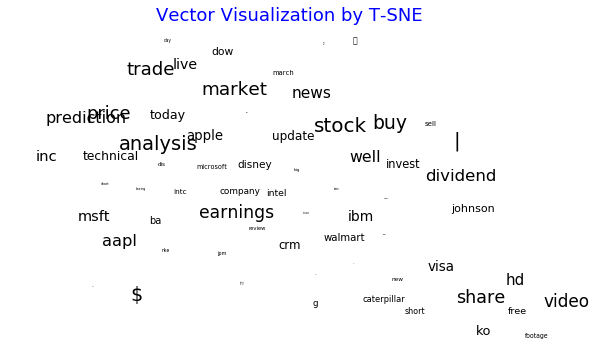

In [130]:
fig = plt.figure(figsize = (10,6))
ax = fig.add_subplot(111)
ax.set_frame_on(False)
plt.scatter(tsneWords[:, 0], tsneWords[:, 1], alpha = 0)#Making the points invisible 
for i, word in enumerate(targetWords):
    ax.annotate(word, (tsneWords[:, 0][i],tsneWords[:, 1][i]), size =  20 * (numWords - i) / numWords)
plt.title('Vector Visualization by T-SNE', size = 18, color = "blue")
plt.xticks(())
plt.yticks(())
plt.savefig('w2v_tsne_dow.jpg')
plt.show()

In [145]:
text = ' '.join(data['normalized_tokens'].sum())

In [180]:
def grey_color_func(word, font_size, position,orientation,random_state=None, **kwargs):
    return("hsl(360,100%%, %d%%)" % np.random.randint(50,150))

#@interact(season = "21 spring")
def plot_word_cloud(text):
    #text = ' '.join(data['normalized_tokens'].sum())
    wc = wordcloud.WordCloud(width=1600, height=800,).generate(text)

    wc.recolor(color_func = grey_color_func)
    plt.figure(figsize=(12,12), facecolor='k')
    plt.imshow(wc)
    plt.axis("off")
    plt.tight_layout(pad=0)
    plt.savefig('dow_wordcloud.jpg')
    plt.show()

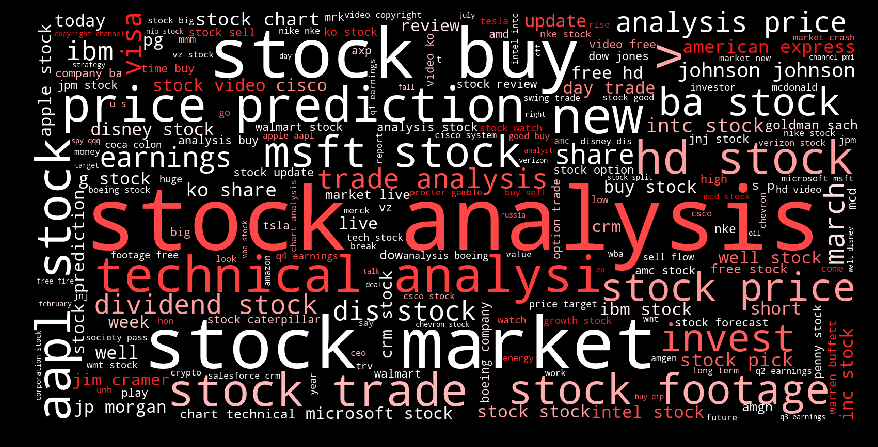

In [181]:
plot_word_cloud(text)

In [186]:
def normalize(vector):
    normalized_vector = vector / np.linalg.norm(vector)
    return normalized_vector

def dimension(model, positives, negatives):
    diff = sum([normalize(model[x]) for x in positives]) - sum([normalize(model[y]) for y in negatives])
    return diff

In [282]:
Trend = dimension(W2V, ['increase','soar', 'rise', 'raise', 'rocket', 'good'], ['decline', 'cut', 'drop', 'recession', 'dip', 'bad'])
Attitude = dimension(W2V, ['crazy','urgent', 'mad', 'rush'], ['reason', 'rational', 'analysis', 'chill'])
Trust = dimension(W2V, ['trust', 'believe', 'true', 'real', 'honest'], ['fake', 'confuse', 'default', 'fool'])


In [286]:
Companies = ['apple', 'boeing', 'facebook', 'google', 'gm', 'amazon', 'amc', 'gamestop', 'microsoft']
participants = ['investor', 'analyst', 'fund', 'bank', 'government', 'reddit', 'news', 'jpmorgan', 'moass']
#Country = ['china', 'u.s', 'uk', 'russia', 'europe', 'japan', 'canada', 'australia', 'singapore', 'italy']
#Industries = ['food', 'oil', 'energy', 'agriculture', 'service', 'education', 'medical', 'finance']

In [216]:
def makeDF(model, word_list):
    a = []
    b = []
    c = []
    for word in word_list:
        a.append(sklearn.metrics.pairwise.cosine_similarity(W2V[word].reshape(1,-1), Trend.reshape(1,-1))[0][0])
        b.append(sklearn.metrics.pairwise.cosine_similarity(W2V[word].reshape(1,-1), Attitude.reshape(1,-1))[0][0])
        c.append(sklearn.metrics.pairwise.cosine_similarity(W2V[word].reshape(1,-1), Trust.reshape(1,-1))[0][0])
    df = pandas.DataFrame({'Trend': a, 'Attitude': b, 'Trust': c}, index = word_list)
    return df

In [287]:
Comdf = makeDF(W2V, Companies) 
Pardf = makeDF(W2V, participants)
#Inddf = makeDF(W2V, Industries)

In [251]:
def Coloring(Series):
    x = Series.values
    y = x-x.min()
    z = y/y.max()
    c = list(plt.cm.jet(z))
    return c

def PlotDimension(ax,df, dim):
    ax.set_frame_on(False)
    ax.set_title(dim, fontsize = 20)
    colors = Coloring(df[dim])
    for i, word in enumerate(df.index):
        ax.annotate(word, (0, df[dim][i]), color = colors[i], alpha = 1, fontsize = 12)
    MaxY = df[dim].max()
    MinY = df[dim].min()
    plt.ylim(MinY,MaxY)
    plt.yticks(())
    plt.xticks(())

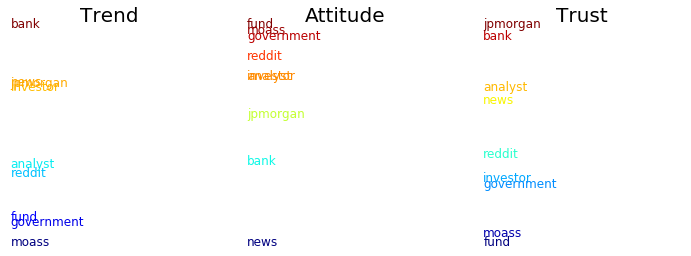

In [289]:
fig = plt.figure(figsize = (12,4))
ax1 = fig.add_subplot(131)
PlotDimension(ax1, Pardf, 'Trend')
ax2 = fig.add_subplot(132)
PlotDimension(ax2, Pardf, 'Attitude')
ax3 = fig.add_subplot(133)
PlotDimension(ax3, Pardf, 'Trust')
plt.savefig('dim_proj_dow_par.jpg')
plt.show()

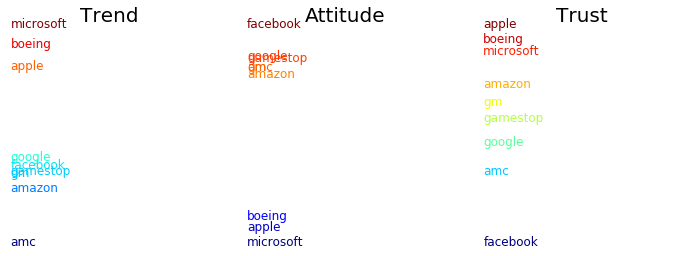

In [290]:
fig = plt.figure(figsize = (12,4))
ax1 = fig.add_subplot(131)
PlotDimension(ax1, Comdf, 'Trend')
ax2 = fig.add_subplot(132)
PlotDimension(ax2, Comdf, 'Attitude')
ax3 = fig.add_subplot(133)
PlotDimension(ax3, Comdf, 'Trust')
plt.savefig('dim_proj_dow_com.jpg')
plt.show()